In [1]:
%matplotlib inline

In [2]:
from keras.layers import Activation, LSTM, Dense, Dropout
from keras.models import Sequential

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [3]:
Store = 67

data = pd.read_csv('train.csv', index_col="Date", parse_dates=["Date"])
data.drop(["DayOfWeek", "Customers", "Open", "Promo", "StateHoliday", "SchoolHoliday"], inplace=True, axis=1)
store = data[data.Store == Store].Sales
store_ts = store.resample("W").sum()

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
look_back = 3

scaler = MinMaxScaler((-1,1))
data_scaled = scaler.fit_transform(store_ts.reshape(-1, 1))

convert_to_step = lambda interval: data_scaled[interval[0]:interval[1]]
intervals = zip(range(len(data_scaled) - look_back), range(look_back, len(data_scaled)))

train_set, test_set = train_test_split(np.array(list(map(convert_to_step, intervals))), shuffle=False)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [5]:
X, y = train_set[:-1], train_set[1:, -1]
X_test, y_test = test_set[:-1], test_set[1:, -1]

In [10]:
model = Sequential([
    LSTM(64, input_shape=(look_back, 1), batch_size=32, return_sequences=True, stateful=True),
    LSTM(64, stateful=True, return_sequences=True),
    LSTM(64, stateful=True, return_sequences=True),
    LSTM(64, stateful=True),
    Dense(1)
])
model.compile(loss='mape', optimizer='adam')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (32, 3, 64)               16896     
_________________________________________________________________
lstm_14 (LSTM)               (32, 3, 64)               33024     
_________________________________________________________________
lstm_15 (LSTM)               (32, 3, 64)               33024     
_________________________________________________________________
lstm_16 (LSTM)               (32, 64)                  33024     
_________________________________________________________________
dense_4 (Dense)              (32, 1)                   65        
Total params: 116,033
Trainable params: 116,033
Non-trainable params: 0
_________________________________________________________________


In [9]:
history = model.fit(X[:-2], y[:-2], epochs=10000, validation_data=(X_test, y_test), batch_size=32)

Train on 96 samples, validate on 32 samples
Epoch 1/10000
96/96 [==============================] - 1s 13ms/step - loss: 105.9250 - val_loss: 103.4944
Epoch 2/10000
96/96 [==============================] - 0s 427us/step - loss: 101.5695 - val_loss: 94.1294
Epoch 3/10000
96/96 [==============================] - 0s 421us/step - loss: 104.3783 - val_loss: 94.8066
Epoch 4/10000
96/96 [==============================] - 0s 396us/step - loss: 100.7280 - val_loss: 99.5036
Epoch 5/10000
96/96 [==============================] - 0s 429us/step - loss: 100.7978 - val_loss: 101.1453
Epoch 6/10000
96/96 [==============================] - 0s 426us/step - loss: 100.7760 - val_loss: 98.7927
Epoch 7/10000
96/96 [==============================] - 0s 412us/step - loss: 98.4718 - val_loss: 96.7627
Epoch 8/10000
96/96 [==============================] - 0s 392us/step - loss: 100.2383 - val_loss: 95.5721
Epoch 9/10000
96/96 [==============================] - 0s 482us/step - loss: 100.7553 - val_loss: 95.8075
Ep

Epoch 78/10000
96/96 [==============================] - 0s 430us/step - loss: 99.0382 - val_loss: 97.8421
Epoch 79/10000
96/96 [==============================] - 0s 385us/step - loss: 99.2216 - val_loss: 97.0444
Epoch 80/10000
96/96 [==============================] - 0s 376us/step - loss: 98.3056 - val_loss: 97.0650
Epoch 81/10000
96/96 [==============================] - 0s 407us/step - loss: 99.1901 - val_loss: 98.4200
Epoch 82/10000
96/96 [==============================] - 0s 428us/step - loss: 98.7020 - val_loss: 99.5244
Epoch 83/10000
96/96 [==============================] - 0s 472us/step - loss: 99.5513 - val_loss: 98.7690
Epoch 84/10000
96/96 [==============================] - 0s 469us/step - loss: 98.6686 - val_loss: 98.7043
Epoch 85/10000
96/96 [==============================] - 0s 499us/step - loss: 98.3190 - val_loss: 97.0428
Epoch 86/10000
96/96 [==============================] - 0s 529us/step - loss: 100.4348 - val_loss: 96.0116
Epoch 87/10000
96/96 [=======================

96/96 [==============================] - 0s 399us/step - loss: 99.0548 - val_loss: 99.8695
Epoch 231/10000
96/96 [==============================] - 0s 361us/step - loss: 98.2651 - val_loss: 98.7037
Epoch 232/10000
96/96 [==============================] - 0s 425us/step - loss: 98.3826 - val_loss: 97.9548
Epoch 233/10000
96/96 [==============================] - 0s 418us/step - loss: 97.9319 - val_loss: 96.6362
Epoch 234/10000
96/96 [==============================] - 0s 452us/step - loss: 100.9770 - val_loss: 99.5633
Epoch 235/10000
96/96 [==============================] - 0s 398us/step - loss: 98.6162 - val_loss: 99.7534
Epoch 236/10000
96/96 [==============================] - 0s 384us/step - loss: 98.3532 - val_loss: 99.0410
Epoch 237/10000
96/96 [==============================] - 0s 361us/step - loss: 96.9433 - val_loss: 98.3200
Epoch 238/10000
96/96 [==============================] - 0s 434us/step - loss: 97.8452 - val_loss: 98.9677
Epoch 239/10000
96/96 [=============================

96/96 [==============================] - 0s 390us/step - loss: 96.5529 - val_loss: 98.5509
Epoch 383/10000
96/96 [==============================] - 0s 402us/step - loss: 98.8705 - val_loss: 99.5077
Epoch 384/10000
96/96 [==============================] - 0s 405us/step - loss: 99.2797 - val_loss: 98.7698
Epoch 385/10000
96/96 [==============================] - 0s 373us/step - loss: 96.8129 - val_loss: 97.4560
Epoch 386/10000
96/96 [==============================] - 0s 380us/step - loss: 100.2632 - val_loss: 95.1058
Epoch 387/10000
96/96 [==============================] - 0s 402us/step - loss: 98.0398 - val_loss: 95.6668
Epoch 388/10000
96/96 [==============================] - 0s 396us/step - loss: 100.6695 - val_loss: 97.2536
Epoch 389/10000
96/96 [==============================] - 0s 395us/step - loss: 96.7291 - val_loss: 97.1523
Epoch 390/10000
96/96 [==============================] - 0s 395us/step - loss: 98.2354 - val_loss: 97.7094
Epoch 391/10000
96/96 [============================

96/96 [==============================] - 0s 470us/step - loss: 95.2349 - val_loss: 94.4052
Epoch 535/10000
96/96 [==============================] - 0s 379us/step - loss: 94.9696 - val_loss: 95.8934
Epoch 536/10000
96/96 [==============================] - 0s 423us/step - loss: 95.1246 - val_loss: 94.9718
Epoch 537/10000
96/96 [==============================] - 0s 384us/step - loss: 95.4848 - val_loss: 96.5342
Epoch 538/10000
96/96 [==============================] - 0s 497us/step - loss: 95.5308 - val_loss: 96.8071
Epoch 539/10000
96/96 [==============================] - 0s 456us/step - loss: 95.0083 - val_loss: 95.9692
Epoch 540/10000
96/96 [==============================] - 0s 411us/step - loss: 95.9183 - val_loss: 96.1800
Epoch 541/10000
96/96 [==============================] - 0s 420us/step - loss: 96.4149 - val_loss: 94.8981
Epoch 542/10000
96/96 [==============================] - 0s 384us/step - loss: 94.9036 - val_loss: 94.5325
Epoch 543/10000
96/96 [==============================

96/96 [==============================] - 0s 360us/step - loss: 93.8140 - val_loss: 94.9574
Epoch 687/10000
96/96 [==============================] - 0s 416us/step - loss: 94.2437 - val_loss: 95.7016
Epoch 688/10000
96/96 [==============================] - 0s 397us/step - loss: 94.1075 - val_loss: 94.7474
Epoch 689/10000
96/96 [==============================] - 0s 414us/step - loss: 98.8852 - val_loss: 94.1049
Epoch 690/10000
96/96 [==============================] - 0s 461us/step - loss: 94.7177 - val_loss: 95.2301
Epoch 691/10000
96/96 [==============================] - 0s 424us/step - loss: 95.3792 - val_loss: 96.5823
Epoch 692/10000
96/96 [==============================] - 0s 395us/step - loss: 95.5953 - val_loss: 95.1329
Epoch 693/10000
96/96 [==============================] - 0s 401us/step - loss: 93.4922 - val_loss: 94.3474
Epoch 694/10000
96/96 [==============================] - 0s 388us/step - loss: 94.5145 - val_loss: 94.7505
Epoch 695/10000
96/96 [==============================

96/96 [==============================] - 0s 393us/step - loss: 92.8995 - val_loss: 93.6507
Epoch 839/10000
96/96 [==============================] - 0s 374us/step - loss: 94.4293 - val_loss: 95.1126
Epoch 840/10000
96/96 [==============================] - 0s 398us/step - loss: 94.2488 - val_loss: 94.2216
Epoch 841/10000
96/96 [==============================] - 0s 363us/step - loss: 95.6868 - val_loss: 95.3736
Epoch 842/10000
96/96 [==============================] - 0s 387us/step - loss: 94.5002 - val_loss: 94.5639
Epoch 843/10000
96/96 [==============================] - 0s 392us/step - loss: 95.7877 - val_loss: 93.6568
Epoch 844/10000
96/96 [==============================] - 0s 380us/step - loss: 94.5618 - val_loss: 94.1007
Epoch 845/10000
96/96 [==============================] - 0s 413us/step - loss: 95.6166 - val_loss: 94.6676
Epoch 846/10000
96/96 [==============================] - 0s 399us/step - loss: 94.2360 - val_loss: 94.4864
Epoch 847/10000
96/96 [==============================

96/96 [==============================] - 0s 381us/step - loss: 94.3454 - val_loss: 96.7725
Epoch 991/10000
96/96 [==============================] - 0s 384us/step - loss: 93.0964 - val_loss: 97.8981
Epoch 992/10000
96/96 [==============================] - 0s 405us/step - loss: 102.0747 - val_loss: 96.3429
Epoch 993/10000
96/96 [==============================] - 0s 475us/step - loss: 93.5933 - val_loss: 95.6772
Epoch 994/10000
96/96 [==============================] - 0s 513us/step - loss: 90.9851 - val_loss: 94.1704
Epoch 995/10000
96/96 [==============================] - 0s 431us/step - loss: 94.5549 - val_loss: 94.2255
Epoch 996/10000
96/96 [==============================] - 0s 389us/step - loss: 95.3124 - val_loss: 95.1818
Epoch 997/10000
96/96 [==============================] - 0s 471us/step - loss: 95.1176 - val_loss: 95.4870
Epoch 998/10000
96/96 [==============================] - 0s 387us/step - loss: 95.8339 - val_loss: 95.2945
Epoch 999/10000
96/96 [=============================

96/96 [==============================] - 0s 380us/step - loss: 95.3793 - val_loss: 94.0408
Epoch 1067/10000
96/96 [==============================] - 0s 395us/step - loss: 94.8864 - val_loss: 95.7471
Epoch 1068/10000
96/96 [==============================] - 0s 374us/step - loss: 92.4259 - val_loss: 93.7010
Epoch 1069/10000
96/96 [==============================] - 0s 412us/step - loss: 93.7818 - val_loss: 95.3744
Epoch 1070/10000
96/96 [==============================] - 0s 368us/step - loss: 90.6109 - val_loss: 96.4409
Epoch 1071/10000
96/96 [==============================] - 0s 363us/step - loss: 90.3473 - val_loss: 96.2278
Epoch 1072/10000
96/96 [==============================] - 0s 370us/step - loss: 94.2209 - val_loss: 94.5127
Epoch 1073/10000
96/96 [==============================] - 0s 371us/step - loss: 93.3803 - val_loss: 94.3750
Epoch 1074/10000
96/96 [==============================] - 0s 420us/step - loss: 90.6743 - val_loss: 96.0681
Epoch 1075/10000
96/96 [=====================

96/96 [==============================] - 0s 395us/step - loss: 90.7053 - val_loss: 92.9591
Epoch 1143/10000
96/96 [==============================] - 0s 400us/step - loss: 91.8269 - val_loss: 92.4662
Epoch 1144/10000
96/96 [==============================] - 0s 392us/step - loss: 92.0308 - val_loss: 96.2254
Epoch 1145/10000
96/96 [==============================] - 0s 391us/step - loss: 90.2294 - val_loss: 93.4749
Epoch 1146/10000
96/96 [==============================] - 0s 393us/step - loss: 98.0673 - val_loss: 97.0957
Epoch 1147/10000
96/96 [==============================] - 0s 404us/step - loss: 93.8222 - val_loss: 96.2819
Epoch 1148/10000
96/96 [==============================] - 0s 436us/step - loss: 92.2400 - val_loss: 96.4701
Epoch 1149/10000
96/96 [==============================] - 0s 360us/step - loss: 89.3554 - val_loss: 95.2740
Epoch 1150/10000
96/96 [==============================] - 0s 428us/step - loss: 97.0560 - val_loss: 95.3061
Epoch 1151/10000
96/96 [=====================

96/96 [==============================] - 0s 411us/step - loss: 88.7216 - val_loss: 96.5739
Epoch 1219/10000
96/96 [==============================] - 0s 432us/step - loss: 88.5227 - val_loss: 91.6065
Epoch 1220/10000
96/96 [==============================] - 0s 368us/step - loss: 88.4407 - val_loss: 95.0436
Epoch 1221/10000
96/96 [==============================] - 0s 398us/step - loss: 94.7555 - val_loss: 96.7442
Epoch 1222/10000
96/96 [==============================] - 0s 388us/step - loss: 91.2292 - val_loss: 96.7845
Epoch 1223/10000
96/96 [==============================] - 0s 399us/step - loss: 90.1601 - val_loss: 89.7535
Epoch 1224/10000
96/96 [==============================] - 0s 410us/step - loss: 94.7980 - val_loss: 93.2008
Epoch 1225/10000
96/96 [==============================] - 0s 367us/step - loss: 89.4679 - val_loss: 95.6043
Epoch 1226/10000
96/96 [==============================] - 0s 458us/step - loss: 90.5355 - val_loss: 98.2508
Epoch 1227/10000
96/96 [=====================

96/96 [==============================] - 0s 379us/step - loss: 88.0779 - val_loss: 92.6395
Epoch 1295/10000
96/96 [==============================] - 0s 397us/step - loss: 92.0099 - val_loss: 94.5856
Epoch 1296/10000
96/96 [==============================] - 0s 439us/step - loss: 90.0075 - val_loss: 93.1594
Epoch 1297/10000
96/96 [==============================] - 0s 468us/step - loss: 85.9480 - val_loss: 95.6906
Epoch 1298/10000
96/96 [==============================] - 0s 453us/step - loss: 84.8788 - val_loss: 90.7911
Epoch 1299/10000
96/96 [==============================] - 0s 416us/step - loss: 88.4569 - val_loss: 95.8629
Epoch 1300/10000
96/96 [==============================] - 0s 437us/step - loss: 88.9656 - val_loss: 100.4787
Epoch 1301/10000
96/96 [==============================] - 0s 387us/step - loss: 86.3043 - val_loss: 100.0648
Epoch 1302/10000
96/96 [==============================] - 0s 381us/step - loss: 86.2183 - val_loss: 91.6832
Epoch 1303/10000
96/96 [===================

Epoch 1370/10000
96/96 [==============================] - 0s 384us/step - loss: 92.5588 - val_loss: 94.2239
Epoch 1371/10000
96/96 [==============================] - 0s 445us/step - loss: 87.8690 - val_loss: 90.5436
Epoch 1372/10000
96/96 [==============================] - 0s 355us/step - loss: 91.0156 - val_loss: 87.9313
Epoch 1373/10000
96/96 [==============================] - 0s 400us/step - loss: 86.0883 - val_loss: 91.5916
Epoch 1374/10000
96/96 [==============================] - 0s 401us/step - loss: 85.3193 - val_loss: 87.4135
Epoch 1375/10000
96/96 [==============================] - 0s 395us/step - loss: 95.9344 - val_loss: 85.5717
Epoch 1376/10000
96/96 [==============================] - 0s 462us/step - loss: 88.2770 - val_loss: 91.1134
Epoch 1377/10000
96/96 [==============================] - 0s 404us/step - loss: 84.4633 - val_loss: 90.2525
Epoch 1378/10000
96/96 [==============================] - 0s 424us/step - loss: 84.7412 - val_loss: 89.6720
Epoch 1379/10000
96/96 [====

Epoch 1446/10000
96/96 [==============================] - 0s 390us/step - loss: 82.2127 - val_loss: 94.2318
Epoch 1447/10000
96/96 [==============================] - 0s 443us/step - loss: 86.9565 - val_loss: 94.9930
Epoch 1448/10000
96/96 [==============================] - 0s 375us/step - loss: 85.9213 - val_loss: 82.6096
Epoch 1449/10000
96/96 [==============================] - 0s 403us/step - loss: 83.1902 - val_loss: 97.1577
Epoch 1450/10000
96/96 [==============================] - 0s 398us/step - loss: 86.7465 - val_loss: 81.7555
Epoch 1451/10000
96/96 [==============================] - 0s 394us/step - loss: 85.3473 - val_loss: 102.0470
Epoch 1452/10000
96/96 [==============================] - 0s 380us/step - loss: 87.0382 - val_loss: 81.7872
Epoch 1453/10000
96/96 [==============================] - 0s 389us/step - loss: 87.5677 - val_loss: 99.0536
Epoch 1454/10000
96/96 [==============================] - 0s 411us/step - loss: 79.0278 - val_loss: 91.3128
Epoch 1455/10000
96/96 [===

Epoch 1522/10000
96/96 [==============================] - 0s 415us/step - loss: 80.5789 - val_loss: 85.3811
Epoch 1523/10000
96/96 [==============================] - 0s 377us/step - loss: 79.2765 - val_loss: 99.5520
Epoch 1524/10000
96/96 [==============================] - 0s 398us/step - loss: 82.1651 - val_loss: 88.5388
Epoch 1525/10000
96/96 [==============================] - 0s 413us/step - loss: 79.8634 - val_loss: 94.6301
Epoch 1526/10000
96/96 [==============================] - 0s 385us/step - loss: 82.7766 - val_loss: 94.5275
Epoch 1527/10000
96/96 [==============================] - 0s 373us/step - loss: 86.1037 - val_loss: 89.4623
Epoch 1528/10000
96/96 [==============================] - 0s 408us/step - loss: 78.4702 - val_loss: 92.0609
Epoch 1529/10000
96/96 [==============================] - 0s 432us/step - loss: 85.1828 - val_loss: 90.5470
Epoch 1530/10000
96/96 [==============================] - 0s 456us/step - loss: 80.7069 - val_loss: 90.8844
Epoch 1531/10000
96/96 [====

Epoch 1598/10000
96/96 [==============================] - 0s 380us/step - loss: 77.9485 - val_loss: 99.6751
Epoch 1599/10000
96/96 [==============================] - 0s 389us/step - loss: 79.5430 - val_loss: 94.1412
Epoch 1600/10000
96/96 [==============================] - 0s 389us/step - loss: 76.1257 - val_loss: 88.3187
Epoch 1601/10000
96/96 [==============================] - 0s 398us/step - loss: 78.8939 - val_loss: 91.2149
Epoch 1602/10000
96/96 [==============================] - 0s 478us/step - loss: 81.7250 - val_loss: 85.4636
Epoch 1603/10000
96/96 [==============================] - 0s 457us/step - loss: 82.4121 - val_loss: 93.5876
Epoch 1604/10000
96/96 [==============================] - 0s 399us/step - loss: 84.9799 - val_loss: 98.4952
Epoch 1605/10000
96/96 [==============================] - 0s 389us/step - loss: 83.4686 - val_loss: 99.5791
Epoch 1606/10000
96/96 [==============================] - 0s 425us/step - loss: 82.2171 - val_loss: 90.6725
Epoch 1607/10000
96/96 [====

Epoch 1674/10000
96/96 [==============================] - 0s 375us/step - loss: 78.8769 - val_loss: 88.1880
Epoch 1675/10000
96/96 [==============================] - 0s 441us/step - loss: 77.6888 - val_loss: 89.3713
Epoch 1676/10000
96/96 [==============================] - 0s 397us/step - loss: 79.7802 - val_loss: 85.7841
Epoch 1677/10000
96/96 [==============================] - 0s 431us/step - loss: 76.4958 - val_loss: 81.6259
Epoch 1678/10000
96/96 [==============================] - 0s 388us/step - loss: 76.4610 - val_loss: 94.9322
Epoch 1679/10000
96/96 [==============================] - 0s 363us/step - loss: 74.1580 - val_loss: 87.3247
Epoch 1680/10000
96/96 [==============================] - 0s 413us/step - loss: 79.1666 - val_loss: 90.1548
Epoch 1681/10000
96/96 [==============================] - 0s 395us/step - loss: 73.5733 - val_loss: 93.0630
Epoch 1682/10000
96/96 [==============================] - 0s 383us/step - loss: 74.1469 - val_loss: 88.2628
Epoch 1683/10000
96/96 [====

Epoch 1750/10000
96/96 [==============================] - 0s 410us/step - loss: 76.0819 - val_loss: 88.2567
Epoch 1751/10000
96/96 [==============================] - 0s 460us/step - loss: 78.2155 - val_loss: 78.5602
Epoch 1752/10000
96/96 [==============================] - 0s 398us/step - loss: 75.6761 - val_loss: 91.2048
Epoch 1753/10000
96/96 [==============================] - 0s 364us/step - loss: 73.8101 - val_loss: 89.8591
Epoch 1754/10000
96/96 [==============================] - 0s 457us/step - loss: 76.4378 - val_loss: 88.6676
Epoch 1755/10000
96/96 [==============================] - 0s 384us/step - loss: 70.3880 - val_loss: 100.6549
Epoch 1756/10000
96/96 [==============================] - 0s 370us/step - loss: 81.8152 - val_loss: 92.9086
Epoch 1757/10000
96/96 [==============================] - 0s 414us/step - loss: 80.4909 - val_loss: 92.8719
Epoch 1758/10000
96/96 [==============================] - 0s 404us/step - loss: 74.8428 - val_loss: 107.6477
Epoch 1759/10000
96/96 [==

Epoch 1826/10000
96/96 [==============================] - 0s 405us/step - loss: 76.4514 - val_loss: 102.7363
Epoch 1827/10000
96/96 [==============================] - 0s 383us/step - loss: 76.1898 - val_loss: 89.6011
Epoch 1828/10000
96/96 [==============================] - 0s 383us/step - loss: 75.6732 - val_loss: 88.0937
Epoch 1829/10000
96/96 [==============================] - 0s 470us/step - loss: 74.7692 - val_loss: 88.4781
Epoch 1830/10000
96/96 [==============================] - 0s 387us/step - loss: 77.4539 - val_loss: 96.8570
Epoch 1831/10000
96/96 [==============================] - 0s 396us/step - loss: 76.3672 - val_loss: 90.6471
Epoch 1832/10000
96/96 [==============================] - 0s 458us/step - loss: 75.1344 - val_loss: 98.4451
Epoch 1833/10000
96/96 [==============================] - 0s 413us/step - loss: 78.5367 - val_loss: 96.8528
Epoch 1834/10000
96/96 [==============================] - 0s 421us/step - loss: 72.9840 - val_loss: 86.9129
Epoch 1835/10000
96/96 [===

Epoch 1902/10000
96/96 [==============================] - 0s 375us/step - loss: 72.7252 - val_loss: 89.9963
Epoch 1903/10000
96/96 [==============================] - 0s 427us/step - loss: 74.8196 - val_loss: 83.5578
Epoch 1904/10000
96/96 [==============================] - 0s 392us/step - loss: 75.3284 - val_loss: 87.2383
Epoch 1905/10000
96/96 [==============================] - 0s 423us/step - loss: 74.2262 - val_loss: 94.4248
Epoch 1906/10000
96/96 [==============================] - 0s 412us/step - loss: 74.9384 - val_loss: 84.6076
Epoch 1907/10000
96/96 [==============================] - 0s 462us/step - loss: 73.0343 - val_loss: 84.2278
Epoch 1908/10000
96/96 [==============================] - 0s 518us/step - loss: 71.7049 - val_loss: 85.4816
Epoch 1909/10000
96/96 [==============================] - 0s 424us/step - loss: 72.5778 - val_loss: 88.9963
Epoch 1910/10000
96/96 [==============================] - 0s 371us/step - loss: 70.0134 - val_loss: 85.9095
Epoch 1911/10000
96/96 [====

Epoch 1978/10000
96/96 [==============================] - 0s 396us/step - loss: 74.6098 - val_loss: 103.3488
Epoch 1979/10000
96/96 [==============================] - 0s 402us/step - loss: 73.2587 - val_loss: 96.9187
Epoch 1980/10000
96/96 [==============================] - 0s 407us/step - loss: 71.5986 - val_loss: 99.1983
Epoch 1981/10000
96/96 [==============================] - 0s 377us/step - loss: 73.5179 - val_loss: 96.0271
Epoch 1982/10000
96/96 [==============================] - 0s 398us/step - loss: 72.1351 - val_loss: 91.2723
Epoch 1983/10000
96/96 [==============================] - 0s 392us/step - loss: 71.2279 - val_loss: 95.9501
Epoch 1984/10000
96/96 [==============================] - 0s 376us/step - loss: 72.7770 - val_loss: 102.2900
Epoch 1985/10000
96/96 [==============================] - 0s 406us/step - loss: 72.9314 - val_loss: 80.6028
Epoch 1986/10000
96/96 [==============================] - 0s 419us/step - loss: 72.5244 - val_loss: 91.4470
Epoch 1987/10000
96/96 [==

Epoch 2054/10000
96/96 [==============================] - 0s 376us/step - loss: 72.6766 - val_loss: 85.8444
Epoch 2055/10000
96/96 [==============================] - 0s 482us/step - loss: 70.9570 - val_loss: 97.0194
Epoch 2056/10000
96/96 [==============================] - 0s 385us/step - loss: 68.5668 - val_loss: 94.6393
Epoch 2057/10000
96/96 [==============================] - 0s 425us/step - loss: 71.9304 - val_loss: 104.0797
Epoch 2058/10000
96/96 [==============================] - 0s 409us/step - loss: 78.6852 - val_loss: 107.9066
Epoch 2059/10000
96/96 [==============================] - 0s 381us/step - loss: 74.9053 - val_loss: 85.6511
Epoch 2060/10000
96/96 [==============================] - 0s 386us/step - loss: 72.8491 - val_loss: 87.2889
Epoch 2061/10000
96/96 [==============================] - 0s 382us/step - loss: 70.4706 - val_loss: 95.8867
Epoch 2062/10000
96/96 [==============================] - 0s 430us/step - loss: 70.5537 - val_loss: 93.0626
Epoch 2063/10000
96/96 [==

Epoch 2130/10000
96/96 [==============================] - 0s 386us/step - loss: 78.4436 - val_loss: 81.7950
Epoch 2131/10000
96/96 [==============================] - 0s 418us/step - loss: 74.0470 - val_loss: 85.9076
Epoch 2132/10000
96/96 [==============================] - 0s 389us/step - loss: 73.3172 - val_loss: 91.4535
Epoch 2133/10000
96/96 [==============================] - 0s 417us/step - loss: 73.7573 - val_loss: 91.4124
Epoch 2134/10000
96/96 [==============================] - 0s 386us/step - loss: 71.6777 - val_loss: 87.2484
Epoch 2135/10000
96/96 [==============================] - 0s 419us/step - loss: 74.1766 - val_loss: 83.1272
Epoch 2136/10000
96/96 [==============================] - 0s 420us/step - loss: 70.0637 - val_loss: 86.2762
Epoch 2137/10000
96/96 [==============================] - 0s 379us/step - loss: 72.5297 - val_loss: 81.8495
Epoch 2138/10000
96/96 [==============================] - 0s 381us/step - loss: 72.3035 - val_loss: 84.6923
Epoch 2139/10000
96/96 [====

Epoch 2206/10000
96/96 [==============================] - 0s 403us/step - loss: 70.5069 - val_loss: 93.4180
Epoch 2207/10000
96/96 [==============================] - 0s 419us/step - loss: 71.1815 - val_loss: 91.0320
Epoch 2208/10000
96/96 [==============================] - 0s 435us/step - loss: 74.2934 - val_loss: 95.4829
Epoch 2209/10000
96/96 [==============================] - 0s 387us/step - loss: 74.3184 - val_loss: 79.3083
Epoch 2210/10000
96/96 [==============================] - 0s 433us/step - loss: 77.7537 - val_loss: 103.4648
Epoch 2211/10000
96/96 [==============================] - 0s 471us/step - loss: 73.0980 - val_loss: 97.3688
Epoch 2212/10000
96/96 [==============================] - 0s 425us/step - loss: 75.1501 - val_loss: 109.4820
Epoch 2213/10000
96/96 [==============================] - 0s 407us/step - loss: 72.5763 - val_loss: 90.4262
Epoch 2214/10000
96/96 [==============================] - 0s 369us/step - loss: 69.8501 - val_loss: 89.2968
Epoch 2215/10000
96/96 [==

Epoch 2282/10000
96/96 [==============================] - 0s 409us/step - loss: 68.4231 - val_loss: 91.1276
Epoch 2283/10000
96/96 [==============================] - 0s 414us/step - loss: 68.8801 - val_loss: 96.7654
Epoch 2284/10000
96/96 [==============================] - 0s 384us/step - loss: 67.6291 - val_loss: 93.7273
Epoch 2285/10000
96/96 [==============================] - 0s 389us/step - loss: 69.2695 - val_loss: 98.0402
Epoch 2286/10000
96/96 [==============================] - 0s 378us/step - loss: 66.2607 - val_loss: 92.7312
Epoch 2287/10000
96/96 [==============================] - 0s 432us/step - loss: 66.6544 - val_loss: 98.3167
Epoch 2288/10000
96/96 [==============================] - 0s 409us/step - loss: 69.3131 - val_loss: 90.9442
Epoch 2289/10000
96/96 [==============================] - 0s 398us/step - loss: 67.6141 - val_loss: 94.6020
Epoch 2290/10000
96/96 [==============================] - 0s 404us/step - loss: 67.1503 - val_loss: 94.7061
Epoch 2291/10000
96/96 [====

Epoch 2433/10000
96/96 [==============================] - 0s 532us/step - loss: 72.8836 - val_loss: 107.8795
Epoch 2434/10000
96/96 [==============================] - 0s 482us/step - loss: 69.2836 - val_loss: 102.0565
Epoch 2435/10000
96/96 [==============================] - 0s 437us/step - loss: 73.3462 - val_loss: 96.1516
Epoch 2436/10000
96/96 [==============================] - 0s 377us/step - loss: 65.0595 - val_loss: 101.3419
Epoch 2437/10000
96/96 [==============================] - 0s 434us/step - loss: 68.7544 - val_loss: 84.4370
Epoch 2438/10000
96/96 [==============================] - 0s 407us/step - loss: 67.5593 - val_loss: 94.7242
Epoch 2439/10000
96/96 [==============================] - 0s 407us/step - loss: 68.1368 - val_loss: 92.5431
Epoch 2440/10000
96/96 [==============================] - 0s 427us/step - loss: 67.7828 - val_loss: 98.8441
Epoch 2441/10000
96/96 [==============================] - 0s 450us/step - loss: 67.7108 - val_loss: 95.5749
Epoch 2442/10000
96/96 [=

Epoch 2584/10000
96/96 [==============================] - 0s 403us/step - loss: 59.3344 - val_loss: 89.6611
Epoch 2585/10000
96/96 [==============================] - 0s 370us/step - loss: 60.0209 - val_loss: 97.2172
Epoch 2586/10000
96/96 [==============================] - 0s 403us/step - loss: 61.3335 - val_loss: 100.3550
Epoch 2587/10000
96/96 [==============================] - 0s 430us/step - loss: 58.6810 - val_loss: 93.6417
Epoch 2588/10000
96/96 [==============================] - 0s 430us/step - loss: 63.6300 - val_loss: 103.8634
Epoch 2589/10000
96/96 [==============================] - 0s 411us/step - loss: 57.4758 - val_loss: 97.1029
Epoch 2590/10000
96/96 [==============================] - 0s 379us/step - loss: 61.1362 - val_loss: 101.2600
Epoch 2591/10000
96/96 [==============================] - 0s 355us/step - loss: 60.8885 - val_loss: 105.1613
Epoch 2592/10000
96/96 [==============================] - 0s 504us/step - loss: 62.4539 - val_loss: 95.4623
Epoch 2593/10000
96/96 [

Epoch 2735/10000
96/96 [==============================] - 0s 385us/step - loss: 70.3052 - val_loss: 91.0168
Epoch 2736/10000
96/96 [==============================] - 0s 412us/step - loss: 69.2498 - val_loss: 96.8252
Epoch 2737/10000
96/96 [==============================] - 0s 382us/step - loss: 68.4186 - val_loss: 103.1551
Epoch 2738/10000
96/96 [==============================] - 0s 409us/step - loss: 71.8694 - val_loss: 105.7053
Epoch 2739/10000
96/96 [==============================] - 0s 391us/step - loss: 71.6298 - val_loss: 96.2228
Epoch 2740/10000
96/96 [==============================] - 0s 405us/step - loss: 70.3746 - val_loss: 86.1779
Epoch 2741/10000
96/96 [==============================] - 0s 372us/step - loss: 65.9561 - val_loss: 87.0351
Epoch 2742/10000
96/96 [==============================] - 0s 417us/step - loss: 65.6744 - val_loss: 87.0621
Epoch 2743/10000
96/96 [==============================] - 0s 387us/step - loss: 69.7978 - val_loss: 92.1404
Epoch 2744/10000
96/96 [==

Epoch 2886/10000
96/96 [==============================] - 0s 386us/step - loss: 58.4485 - val_loss: 100.8437
Epoch 2887/10000
96/96 [==============================] - 0s 387us/step - loss: 57.9087 - val_loss: 89.9484
Epoch 2888/10000
96/96 [==============================] - 0s 401us/step - loss: 55.6230 - val_loss: 91.9736
Epoch 2889/10000
96/96 [==============================] - 0s 456us/step - loss: 57.4809 - val_loss: 102.7631
Epoch 2890/10000
96/96 [==============================] - 0s 383us/step - loss: 59.7707 - val_loss: 82.4295
Epoch 2891/10000
96/96 [==============================] - 0s 394us/step - loss: 58.7692 - val_loss: 97.6340
Epoch 2892/10000
96/96 [==============================] - 0s 398us/step - loss: 59.3025 - val_loss: 110.9840
Epoch 2893/10000
96/96 [==============================] - 0s 408us/step - loss: 58.2255 - val_loss: 85.3573
Epoch 2894/10000
96/96 [==============================] - 0s 452us/step - loss: 59.6235 - val_loss: 100.7663
Epoch 2895/10000
96/96 [

Epoch 3037/10000
96/96 [==============================] - 0s 437us/step - loss: 59.9608 - val_loss: 93.2763
Epoch 3038/10000
96/96 [==============================] - 0s 400us/step - loss: 58.1071 - val_loss: 92.9170
Epoch 3039/10000
96/96 [==============================] - 0s 382us/step - loss: 59.6935 - val_loss: 87.8883
Epoch 3040/10000
96/96 [==============================] - 0s 439us/step - loss: 61.3720 - val_loss: 85.2209
Epoch 3041/10000
96/96 [==============================] - 0s 391us/step - loss: 58.1772 - val_loss: 102.2575
Epoch 3042/10000
96/96 [==============================] - 0s 409us/step - loss: 58.1957 - val_loss: 107.2076
Epoch 3043/10000
96/96 [==============================] - 0s 450us/step - loss: 57.7319 - val_loss: 92.5353
Epoch 3044/10000
96/96 [==============================] - 0s 461us/step - loss: 71.1340 - val_loss: 99.2964
Epoch 3045/10000
96/96 [==============================] - 0s 436us/step - loss: 57.4833 - val_loss: 97.8323
Epoch 3046/10000
96/96 [==

96/96 [==============================] - 0s 384us/step - loss: 55.9468 - val_loss: 99.2304
Epoch 3188/10000
96/96 [==============================] - 0s 384us/step - loss: 58.8416 - val_loss: 101.9583
Epoch 3189/10000
96/96 [==============================] - 0s 392us/step - loss: 54.4907 - val_loss: 104.1408
Epoch 3190/10000
96/96 [==============================] - 0s 397us/step - loss: 57.5500 - val_loss: 97.1947
Epoch 3191/10000
96/96 [==============================] - 0s 385us/step - loss: 55.6483 - val_loss: 96.4106
Epoch 3192/10000
96/96 [==============================] - 0s 394us/step - loss: 59.3263 - val_loss: 105.4248
Epoch 3193/10000
96/96 [==============================] - 0s 394us/step - loss: 58.8370 - val_loss: 99.3367
Epoch 3194/10000
96/96 [==============================] - 0s 361us/step - loss: 107.8236 - val_loss: 91.9621
Epoch 3195/10000
96/96 [==============================] - 0s 393us/step - loss: 67.9553 - val_loss: 87.6367
Epoch 3196/10000
96/96 [=================

Epoch 3263/10000
96/96 [==============================] - 0s 320us/step - loss: 58.4487 - val_loss: 97.2790
Epoch 3264/10000
96/96 [==============================] - 0s 318us/step - loss: 56.6898 - val_loss: 97.1545
Epoch 3265/10000
96/96 [==============================] - 0s 346us/step - loss: 55.6089 - val_loss: 95.1316
Epoch 3266/10000
96/96 [==============================] - 0s 337us/step - loss: 56.5439 - val_loss: 103.4265
Epoch 3267/10000
96/96 [==============================] - 0s 360us/step - loss: 57.1674 - val_loss: 93.1036
Epoch 3268/10000
96/96 [==============================] - 0s 351us/step - loss: 53.6965 - val_loss: 94.5652
Epoch 3269/10000
96/96 [==============================] - 0s 322us/step - loss: 59.1661 - val_loss: 95.5366
Epoch 3270/10000
96/96 [==============================] - 0s 349us/step - loss: 56.1171 - val_loss: 93.0366
Epoch 3271/10000
96/96 [==============================] - 0s 331us/step - loss: 52.2722 - val_loss: 112.3772
Epoch 3272/10000
96/96 [==

96/96 [==============================] - 0s 379us/step - loss: 56.0259 - val_loss: 101.8048
Epoch 3414/10000
96/96 [==============================] - 0s 378us/step - loss: 52.6938 - val_loss: 114.2909
Epoch 3415/10000
96/96 [==============================] - 0s 389us/step - loss: 51.9757 - val_loss: 106.3477
Epoch 3416/10000
96/96 [==============================] - 0s 382us/step - loss: 57.1776 - val_loss: 120.5386
Epoch 3417/10000
96/96 [==============================] - 0s 383us/step - loss: 55.8648 - val_loss: 104.9421
Epoch 3418/10000
96/96 [==============================] - 0s 407us/step - loss: 58.8716 - val_loss: 98.3522
Epoch 3419/10000
96/96 [==============================] - 0s 373us/step - loss: 54.1427 - val_loss: 114.5952
Epoch 3420/10000
96/96 [==============================] - 0s 365us/step - loss: 53.6806 - val_loss: 114.4893
Epoch 3421/10000
96/96 [==============================] - 0s 375us/step - loss: 52.0076 - val_loss: 104.6483
Epoch 3422/10000
96/96 [=============

96/96 [==============================] - 0s 387us/step - loss: 52.0429 - val_loss: 106.8255
Epoch 3564/10000
96/96 [==============================] - 0s 407us/step - loss: 49.4966 - val_loss: 114.0120
Epoch 3565/10000
96/96 [==============================] - 0s 419us/step - loss: 51.5300 - val_loss: 88.6873
Epoch 3566/10000
96/96 [==============================] - 0s 381us/step - loss: 52.1938 - val_loss: 111.2330
Epoch 3567/10000
96/96 [==============================] - 0s 382us/step - loss: 54.1647 - val_loss: 96.5041
Epoch 3568/10000
96/96 [==============================] - 0s 420us/step - loss: 55.5839 - val_loss: 103.4840
Epoch 3569/10000
96/96 [==============================] - 0s 431us/step - loss: 55.5147 - val_loss: 92.6181
Epoch 3570/10000
96/96 [==============================] - 0s 393us/step - loss: 54.2477 - val_loss: 102.2088
Epoch 3571/10000
96/96 [==============================] - 0s 449us/step - loss: 52.6393 - val_loss: 110.6257
Epoch 3572/10000
96/96 [===============

Epoch 3639/10000
96/96 [==============================] - 0s 408us/step - loss: 53.3920 - val_loss: 97.3726
Epoch 3640/10000
96/96 [==============================] - 0s 381us/step - loss: 50.1126 - val_loss: 98.2550
Epoch 3641/10000
96/96 [==============================] - 0s 445us/step - loss: 51.0594 - val_loss: 97.5198
Epoch 3642/10000
96/96 [==============================] - 0s 492us/step - loss: 53.3201 - val_loss: 101.9258
Epoch 3643/10000
96/96 [==============================] - 0s 368us/step - loss: 52.3754 - val_loss: 97.6708
Epoch 3644/10000
96/96 [==============================] - 0s 436us/step - loss: 51.7330 - val_loss: 103.2973
Epoch 3645/10000
96/96 [==============================] - 0s 373us/step - loss: 54.7775 - val_loss: 108.0738
Epoch 3646/10000
96/96 [==============================] - 0s 384us/step - loss: 56.2463 - val_loss: 99.4233
Epoch 3647/10000
96/96 [==============================] - 0s 378us/step - loss: 69.1788 - val_loss: 86.2816
Epoch 3648/10000
96/96 [=

96/96 [==============================] - 0s 398us/step - loss: 45.4553 - val_loss: 102.5969
Epoch 3790/10000
96/96 [==============================] - 0s 387us/step - loss: 48.8235 - val_loss: 105.0766
Epoch 3791/10000
96/96 [==============================] - 0s 426us/step - loss: 47.7322 - val_loss: 112.8880
Epoch 3792/10000
96/96 [==============================] - 0s 377us/step - loss: 51.0572 - val_loss: 110.3256
Epoch 3793/10000
96/96 [==============================] - 0s 427us/step - loss: 48.9054 - val_loss: 112.6874
Epoch 3794/10000
96/96 [==============================] - 0s 393us/step - loss: 52.3733 - val_loss: 94.0949
Epoch 3795/10000
96/96 [==============================] - 0s 380us/step - loss: 53.4139 - val_loss: 107.3367
Epoch 3796/10000
96/96 [==============================] - 0s 389us/step - loss: 52.2397 - val_loss: 96.7320
Epoch 3797/10000
96/96 [==============================] - 0s 428us/step - loss: 49.6857 - val_loss: 105.4007
Epoch 3798/10000
96/96 [==============

96/96 [==============================] - 0s 388us/step - loss: 46.8681 - val_loss: 102.9541
Epoch 3940/10000
96/96 [==============================] - 0s 392us/step - loss: 49.7696 - val_loss: 88.4655
Epoch 3941/10000
96/96 [==============================] - 0s 414us/step - loss: 53.0557 - val_loss: 91.0883
Epoch 3942/10000
96/96 [==============================] - 0s 396us/step - loss: 49.5824 - val_loss: 101.7910
Epoch 3943/10000
96/96 [==============================] - 0s 443us/step - loss: 55.9729 - val_loss: 88.6633
Epoch 3944/10000
96/96 [==============================] - 0s 439us/step - loss: 53.3341 - val_loss: 101.1291
Epoch 3945/10000
96/96 [==============================] - 0s 480us/step - loss: 50.6492 - val_loss: 104.3090
Epoch 3946/10000
96/96 [==============================] - 0s 399us/step - loss: 49.5113 - val_loss: 90.0925
Epoch 3947/10000
96/96 [==============================] - 0s 372us/step - loss: 50.4577 - val_loss: 95.8460
Epoch 3948/10000
96/96 [=================

Epoch 4090/10000
96/96 [==============================] - 0s 375us/step - loss: 36.2301 - val_loss: 97.6299
Epoch 4091/10000
96/96 [==============================] - 0s 417us/step - loss: 34.2350 - val_loss: 99.0745
Epoch 4092/10000
96/96 [==============================] - 0s 384us/step - loss: 34.6163 - val_loss: 94.5202
Epoch 4093/10000
96/96 [==============================] - 0s 364us/step - loss: 34.9492 - val_loss: 86.6302
Epoch 4094/10000
96/96 [==============================] - 0s 470us/step - loss: 35.4667 - val_loss: 92.3833
Epoch 4095/10000
96/96 [==============================] - 0s 390us/step - loss: 33.1790 - val_loss: 89.9824
Epoch 4096/10000
96/96 [==============================] - 0s 417us/step - loss: 37.6328 - val_loss: 98.9946
Epoch 4097/10000
96/96 [==============================] - 0s 425us/step - loss: 34.4448 - val_loss: 105.0106
Epoch 4098/10000
96/96 [==============================] - 0s 384us/step - loss: 72.5364 - val_loss: 86.7869
Epoch 4099/10000
96/96 [===

Epoch 4241/10000
96/96 [==============================] - 0s 368us/step - loss: 42.6423 - val_loss: 95.3239
Epoch 4242/10000
96/96 [==============================] - 0s 369us/step - loss: 42.6333 - val_loss: 94.2029
Epoch 4243/10000
96/96 [==============================] - 0s 401us/step - loss: 48.8708 - val_loss: 99.9300
Epoch 4244/10000
96/96 [==============================] - 0s 405us/step - loss: 47.2056 - val_loss: 85.5540
Epoch 4245/10000
96/96 [==============================] - 0s 464us/step - loss: 42.0223 - val_loss: 93.1873
Epoch 4246/10000
96/96 [==============================] - 0s 474us/step - loss: 50.6556 - val_loss: 85.2336
Epoch 4247/10000
96/96 [==============================] - 0s 390us/step - loss: 52.0055 - val_loss: 94.5623
Epoch 4248/10000
96/96 [==============================] - 0s 419us/step - loss: 39.1910 - val_loss: 96.0318
Epoch 4249/10000
96/96 [==============================] - 0s 375us/step - loss: 43.3115 - val_loss: 103.1254
Epoch 4250/10000
96/96 [===

Epoch 4392/10000
96/96 [==============================] - 0s 388us/step - loss: 32.8923 - val_loss: 95.0062
Epoch 4393/10000
96/96 [==============================] - 0s 408us/step - loss: 33.1371 - val_loss: 99.6386
Epoch 4394/10000
96/96 [==============================] - 0s 440us/step - loss: 32.6606 - val_loss: 83.6236
Epoch 4395/10000
96/96 [==============================] - 0s 384us/step - loss: 31.9334 - val_loss: 79.3864
Epoch 4396/10000
96/96 [==============================] - 0s 476us/step - loss: 30.2550 - val_loss: 85.8354
Epoch 4397/10000
96/96 [==============================] - 0s 396us/step - loss: 31.6278 - val_loss: 94.8117
Epoch 4398/10000
96/96 [==============================] - 0s 407us/step - loss: 27.7271 - val_loss: 96.9546
Epoch 4399/10000
96/96 [==============================] - 0s 391us/step - loss: 29.7743 - val_loss: 85.2901
Epoch 4400/10000
96/96 [==============================] - 0s 377us/step - loss: 28.7812 - val_loss: 83.7980
Epoch 4401/10000
96/96 [====

Epoch 4468/10000
96/96 [==============================] - 0s 380us/step - loss: 31.2001 - val_loss: 94.5279
Epoch 4469/10000
96/96 [==============================] - 0s 465us/step - loss: 27.5720 - val_loss: 95.5207
Epoch 4470/10000
96/96 [==============================] - 0s 393us/step - loss: 27.8547 - val_loss: 98.3713
Epoch 4471/10000
96/96 [==============================] - 0s 398us/step - loss: 30.5777 - val_loss: 98.4126
Epoch 4472/10000
96/96 [==============================] - 0s 406us/step - loss: 31.9768 - val_loss: 94.9339
Epoch 4473/10000
96/96 [==============================] - 0s 368us/step - loss: 31.6158 - val_loss: 88.8377
Epoch 4474/10000
96/96 [==============================] - 0s 410us/step - loss: 28.8062 - val_loss: 84.6159
Epoch 4475/10000
96/96 [==============================] - 0s 417us/step - loss: 30.2688 - val_loss: 86.9416
Epoch 4476/10000
96/96 [==============================] - 0s 389us/step - loss: 31.6163 - val_loss: 84.5095
Epoch 4477/10000
96/96 [====

Epoch 4619/10000
96/96 [==============================] - 0s 386us/step - loss: 26.5031 - val_loss: 85.6979
Epoch 4620/10000
96/96 [==============================] - 0s 404us/step - loss: 29.1852 - val_loss: 81.1500
Epoch 4621/10000
96/96 [==============================] - 0s 414us/step - loss: 36.2875 - val_loss: 87.0278
Epoch 4622/10000
96/96 [==============================] - 0s 408us/step - loss: 30.4034 - val_loss: 102.4690
Epoch 4623/10000
96/96 [==============================] - 0s 374us/step - loss: 35.9478 - val_loss: 91.1361
Epoch 4624/10000
96/96 [==============================] - 0s 398us/step - loss: 34.5738 - val_loss: 95.2987
Epoch 4625/10000
96/96 [==============================] - 0s 419us/step - loss: 31.9534 - val_loss: 88.9029
Epoch 4626/10000
96/96 [==============================] - 0s 427us/step - loss: 31.9790 - val_loss: 94.9585
Epoch 4627/10000
96/96 [==============================] - 0s 394us/step - loss: 29.9318 - val_loss: 93.1168
Epoch 4628/10000
96/96 [===

Epoch 4695/10000
96/96 [==============================] - 0s 391us/step - loss: 26.5120 - val_loss: 83.4286
Epoch 4696/10000
96/96 [==============================] - 0s 431us/step - loss: 25.7281 - val_loss: 85.4192
Epoch 4697/10000
96/96 [==============================] - 0s 383us/step - loss: 26.2035 - val_loss: 91.8338
Epoch 4698/10000
96/96 [==============================] - 0s 416us/step - loss: 23.8987 - val_loss: 88.9243
Epoch 4699/10000
96/96 [==============================] - 0s 390us/step - loss: 39.6992 - val_loss: 89.8570
Epoch 4700/10000
96/96 [==============================] - 0s 382us/step - loss: 27.0985 - val_loss: 101.8813
Epoch 4701/10000
96/96 [==============================] - 0s 384us/step - loss: 32.0385 - val_loss: 99.0116
Epoch 4702/10000
96/96 [==============================] - 0s 398us/step - loss: 34.4650 - val_loss: 94.0683
Epoch 4703/10000
96/96 [==============================] - 0s 412us/step - loss: 40.8399 - val_loss: 91.6309
Epoch 4704/10000
96/96 [===

Epoch 4846/10000
96/96 [==============================] - 0s 402us/step - loss: 25.3392 - val_loss: 93.8649
Epoch 4847/10000
96/96 [==============================] - 0s 452us/step - loss: 26.6026 - val_loss: 108.6710
Epoch 4848/10000
96/96 [==============================] - 0s 491us/step - loss: 28.9857 - val_loss: 94.5327
Epoch 4849/10000
96/96 [==============================] - 0s 422us/step - loss: 23.1133 - val_loss: 89.7354
Epoch 4850/10000
96/96 [==============================] - 0s 423us/step - loss: 26.4165 - val_loss: 95.6701
Epoch 4851/10000
96/96 [==============================] - 0s 386us/step - loss: 28.9574 - val_loss: 92.5408
Epoch 4852/10000
96/96 [==============================] - 0s 376us/step - loss: 25.7564 - val_loss: 92.8920
Epoch 4853/10000
96/96 [==============================] - 0s 420us/step - loss: 26.9350 - val_loss: 100.0870
Epoch 4854/10000
96/96 [==============================] - 0s 431us/step - loss: 28.6133 - val_loss: 89.6710
Epoch 4855/10000
96/96 [==

Epoch 4997/10000
96/96 [==============================] - 0s 428us/step - loss: 25.8167 - val_loss: 79.3314
Epoch 4998/10000
96/96 [==============================] - 0s 447us/step - loss: 26.5217 - val_loss: 88.0233
Epoch 4999/10000
96/96 [==============================] - 0s 396us/step - loss: 24.6289 - val_loss: 101.0372
Epoch 5000/10000
96/96 [==============================] - 0s 441us/step - loss: 26.1951 - val_loss: 89.8168
Epoch 5001/10000
96/96 [==============================] - 0s 428us/step - loss: 26.5585 - val_loss: 94.4457
Epoch 5002/10000
96/96 [==============================] - 0s 396us/step - loss: 28.3362 - val_loss: 93.7117
Epoch 5003/10000
96/96 [==============================] - 0s 449us/step - loss: 27.0329 - val_loss: 98.0288
Epoch 5004/10000
96/96 [==============================] - 0s 412us/step - loss: 28.8144 - val_loss: 99.4343
Epoch 5005/10000
96/96 [==============================] - 0s 356us/step - loss: 24.0859 - val_loss: 100.8459
Epoch 5006/10000
96/96 [==

Epoch 5148/10000
96/96 [==============================] - 0s 365us/step - loss: 36.5697 - val_loss: 86.5023
Epoch 5149/10000
96/96 [==============================] - 0s 379us/step - loss: 32.0997 - val_loss: 96.9538
Epoch 5150/10000
96/96 [==============================] - 0s 445us/step - loss: 30.0010 - val_loss: 101.6298
Epoch 5151/10000
96/96 [==============================] - 0s 430us/step - loss: 27.9984 - val_loss: 102.8599
Epoch 5152/10000
96/96 [==============================] - 0s 425us/step - loss: 34.0344 - val_loss: 101.7624
Epoch 5153/10000
96/96 [==============================] - 0s 382us/step - loss: 33.9700 - val_loss: 92.4268
Epoch 5154/10000
96/96 [==============================] - 0s 372us/step - loss: 29.9300 - val_loss: 90.7067
Epoch 5155/10000
96/96 [==============================] - 0s 453us/step - loss: 28.8026 - val_loss: 92.8664
Epoch 5156/10000
96/96 [==============================] - 0s 409us/step - loss: 29.6925 - val_loss: 105.0540
Epoch 5157/10000
96/96 [

Epoch 5299/10000
96/96 [==============================] - 0s 394us/step - loss: 30.6393 - val_loss: 101.7684
Epoch 5300/10000
96/96 [==============================] - 0s 430us/step - loss: 31.5424 - val_loss: 91.8675
Epoch 5301/10000
96/96 [==============================] - 0s 542us/step - loss: 32.1428 - val_loss: 88.3251
Epoch 5302/10000
96/96 [==============================] - 0s 435us/step - loss: 31.4816 - val_loss: 101.8499
Epoch 5303/10000
96/96 [==============================] - 0s 489us/step - loss: 26.7585 - val_loss: 99.4971
Epoch 5304/10000
96/96 [==============================] - 0s 380us/step - loss: 28.1780 - val_loss: 85.2805
Epoch 5305/10000
96/96 [==============================] - 0s 424us/step - loss: 31.9149 - val_loss: 98.1116
Epoch 5306/10000
96/96 [==============================] - 0s 415us/step - loss: 92.5115 - val_loss: 95.9666
Epoch 5307/10000
96/96 [==============================] - 0s 391us/step - loss: 33.8629 - val_loss: 102.8991
Epoch 5308/10000
96/96 [=

96/96 [==============================] - 0s 416us/step - loss: 21.6111 - val_loss: 102.9738
Epoch 5450/10000
96/96 [==============================] - 0s 409us/step - loss: 25.0543 - val_loss: 108.9760
Epoch 5451/10000
96/96 [==============================] - 0s 381us/step - loss: 24.2921 - val_loss: 110.0880
Epoch 5452/10000
96/96 [==============================] - 0s 452us/step - loss: 20.4799 - val_loss: 111.2654
Epoch 5453/10000
96/96 [==============================] - 0s 372us/step - loss: 24.3500 - val_loss: 85.2593
Epoch 5454/10000
96/96 [==============================] - 0s 406us/step - loss: 22.5606 - val_loss: 89.3711
Epoch 5455/10000
96/96 [==============================] - 0s 431us/step - loss: 22.4350 - val_loss: 105.6493
Epoch 5456/10000
96/96 [==============================] - 0s 476us/step - loss: 23.9845 - val_loss: 91.5946
Epoch 5457/10000
96/96 [==============================] - 0s 553us/step - loss: 22.5228 - val_loss: 114.6919
Epoch 5458/10000
96/96 [===============

96/96 [==============================] - 0s 413us/step - loss: 30.0419 - val_loss: 89.4620
Epoch 5600/10000
96/96 [==============================] - 0s 401us/step - loss: 29.8378 - val_loss: 100.1671
Epoch 5601/10000
96/96 [==============================] - 0s 374us/step - loss: 28.8973 - val_loss: 98.7294
Epoch 5602/10000
96/96 [==============================] - 0s 378us/step - loss: 24.7511 - val_loss: 101.8775
Epoch 5603/10000
96/96 [==============================] - 0s 416us/step - loss: 30.7312 - val_loss: 93.1362
Epoch 5604/10000
96/96 [==============================] - 0s 376us/step - loss: 23.9119 - val_loss: 99.6286
Epoch 5605/10000
96/96 [==============================] - 0s 358us/step - loss: 22.0375 - val_loss: 92.8381
Epoch 5606/10000
96/96 [==============================] - 0s 376us/step - loss: 22.8813 - val_loss: 100.1571
Epoch 5607/10000
96/96 [==============================] - 0s 385us/step - loss: 21.8894 - val_loss: 102.7182
Epoch 5608/10000
96/96 [=================

Epoch 5675/10000
96/96 [==============================] - 0s 386us/step - loss: 18.4927 - val_loss: 90.8423
Epoch 5676/10000
96/96 [==============================] - 0s 387us/step - loss: 19.3171 - val_loss: 79.9419
Epoch 5677/10000
96/96 [==============================] - 0s 402us/step - loss: 18.5236 - val_loss: 102.5487
Epoch 5678/10000
96/96 [==============================] - 0s 430us/step - loss: 18.8718 - val_loss: 87.3279
Epoch 5679/10000
96/96 [==============================] - 0s 461us/step - loss: 17.5540 - val_loss: 115.9720
Epoch 5680/10000
96/96 [==============================] - 0s 422us/step - loss: 21.0599 - val_loss: 85.9246
Epoch 5681/10000
96/96 [==============================] - 0s 394us/step - loss: 18.2785 - val_loss: 104.6714
Epoch 5682/10000
96/96 [==============================] - 0s 399us/step - loss: 21.0565 - val_loss: 100.6270
Epoch 5683/10000
96/96 [==============================] - 0s 395us/step - loss: 19.8226 - val_loss: 100.9457
Epoch 5684/10000
96/96 

96/96 [==============================] - 0s 397us/step - loss: 18.4656 - val_loss: 96.5524
Epoch 5826/10000
96/96 [==============================] - 0s 377us/step - loss: 19.2512 - val_loss: 113.4279
Epoch 5827/10000
96/96 [==============================] - 0s 494us/step - loss: 19.4791 - val_loss: 103.5965
Epoch 5828/10000
96/96 [==============================] - 0s 387us/step - loss: 15.9506 - val_loss: 80.4985
Epoch 5829/10000
96/96 [==============================] - 0s 389us/step - loss: 17.8133 - val_loss: 99.7782
Epoch 5830/10000
96/96 [==============================] - 0s 379us/step - loss: 17.9328 - val_loss: 94.8596
Epoch 5831/10000
96/96 [==============================] - 0s 398us/step - loss: 19.8151 - val_loss: 87.0099
Epoch 5832/10000
96/96 [==============================] - 0s 419us/step - loss: 17.7262 - val_loss: 93.0797
Epoch 5833/10000
96/96 [==============================] - 0s 427us/step - loss: 20.9455 - val_loss: 92.9381
Epoch 5834/10000
96/96 [===================

96/96 [==============================] - 0s 467us/step - loss: 18.5657 - val_loss: 98.3290
Epoch 5976/10000
96/96 [==============================] - 0s 444us/step - loss: 18.8005 - val_loss: 92.5935
Epoch 5977/10000
96/96 [==============================] - 0s 416us/step - loss: 18.6453 - val_loss: 103.7060
Epoch 5978/10000
96/96 [==============================] - 0s 472us/step - loss: 20.2406 - val_loss: 101.1721
Epoch 5979/10000
96/96 [==============================] - 0s 394us/step - loss: 21.7305 - val_loss: 102.2622
Epoch 5980/10000
96/96 [==============================] - 0s 408us/step - loss: 17.0126 - val_loss: 88.7920
Epoch 5981/10000
96/96 [==============================] - 0s 401us/step - loss: 14.2678 - val_loss: 92.5272
Epoch 5982/10000
96/96 [==============================] - 0s 396us/step - loss: 16.4923 - val_loss: 92.3970
Epoch 5983/10000
96/96 [==============================] - 0s 426us/step - loss: 17.2875 - val_loss: 97.6815
Epoch 5984/10000
96/96 [==================

Epoch 6126/10000
96/96 [==============================] - 0s 367us/step - loss: 17.3977 - val_loss: 96.8781
Epoch 6127/10000
96/96 [==============================] - 0s 454us/step - loss: 16.1853 - val_loss: 89.8336
Epoch 6128/10000
96/96 [==============================] - 0s 418us/step - loss: 17.2342 - val_loss: 99.9651
Epoch 6129/10000
96/96 [==============================] - 0s 411us/step - loss: 15.3812 - val_loss: 103.1573
Epoch 6130/10000
96/96 [==============================] - 0s 417us/step - loss: 15.7758 - val_loss: 108.9458
Epoch 6131/10000
96/96 [==============================] - 0s 426us/step - loss: 18.3549 - val_loss: 110.4214
Epoch 6132/10000
96/96 [==============================] - 0s 422us/step - loss: 17.1724 - val_loss: 100.4325
Epoch 6133/10000
96/96 [==============================] - 0s 391us/step - loss: 15.0266 - val_loss: 110.9072
Epoch 6134/10000
96/96 [==============================] - 0s 414us/step - loss: 17.1726 - val_loss: 99.0036
Epoch 6135/10000
96/96 

96/96 [==============================] - 0s 436us/step - loss: 16.8853 - val_loss: 110.0549
Epoch 6277/10000
96/96 [==============================] - 0s 419us/step - loss: 17.8914 - val_loss: 109.5364
Epoch 6278/10000
96/96 [==============================] - 0s 401us/step - loss: 17.1978 - val_loss: 90.5610
Epoch 6279/10000
96/96 [==============================] - 0s 520us/step - loss: 18.2148 - val_loss: 91.8970
Epoch 6280/10000
96/96 [==============================] - 0s 412us/step - loss: 18.5938 - val_loss: 96.6111
Epoch 6281/10000
96/96 [==============================] - 0s 391us/step - loss: 23.0521 - val_loss: 91.4396
Epoch 6282/10000
96/96 [==============================] - 0s 448us/step - loss: 17.3564 - val_loss: 103.3966
Epoch 6283/10000
96/96 [==============================] - 0s 353us/step - loss: 31.3909 - val_loss: 113.6962
Epoch 6284/10000
96/96 [==============================] - 0s 403us/step - loss: 50.3503 - val_loss: 116.7425
Epoch 6285/10000
96/96 [================

96/96 [==============================] - 0s 407us/step - loss: 19.0324 - val_loss: 112.7396
Epoch 6427/10000
96/96 [==============================] - 0s 423us/step - loss: 22.6829 - val_loss: 93.0545
Epoch 6428/10000
96/96 [==============================] - 0s 606us/step - loss: 37.4694 - val_loss: 101.6800
Epoch 6429/10000
96/96 [==============================] - 0s 455us/step - loss: 31.4119 - val_loss: 101.0718
Epoch 6430/10000
96/96 [==============================] - 0s 402us/step - loss: 34.3245 - val_loss: 96.4686
Epoch 6431/10000
96/96 [==============================] - 0s 463us/step - loss: 36.7940 - val_loss: 91.3665
Epoch 6432/10000
96/96 [==============================] - 0s 391us/step - loss: 40.0704 - val_loss: 96.9998
Epoch 6433/10000
96/96 [==============================] - 0s 380us/step - loss: 25.9499 - val_loss: 97.6309
Epoch 6434/10000
96/96 [==============================] - 0s 436us/step - loss: 37.3773 - val_loss: 79.7901
Epoch 6435/10000
96/96 [==================

96/96 [==============================] - 0s 422us/step - loss: 11.9072 - val_loss: 111.0692
Epoch 6577/10000
96/96 [==============================] - 0s 425us/step - loss: 13.7959 - val_loss: 95.6376
Epoch 6578/10000
96/96 [==============================] - 0s 528us/step - loss: 12.8212 - val_loss: 113.1215
Epoch 6579/10000
96/96 [==============================] - 0s 443us/step - loss: 15.0651 - val_loss: 109.6653
Epoch 6580/10000
96/96 [==============================] - 0s 458us/step - loss: 15.0268 - val_loss: 116.6274
Epoch 6581/10000
96/96 [==============================] - 0s 419us/step - loss: 15.0724 - val_loss: 121.0309
Epoch 6582/10000
96/96 [==============================] - 0s 435us/step - loss: 12.0964 - val_loss: 98.8399
Epoch 6583/10000
96/96 [==============================] - 0s 387us/step - loss: 15.3947 - val_loss: 107.6277
Epoch 6584/10000
96/96 [==============================] - 0s 402us/step - loss: 12.7076 - val_loss: 113.6738
Epoch 6585/10000
96/96 [==============

96/96 [==============================] - 0s 446us/step - loss: 24.5354 - val_loss: 95.3490
Epoch 6727/10000
96/96 [==============================] - 0s 419us/step - loss: 26.2381 - val_loss: 97.9521
Epoch 6728/10000
96/96 [==============================] - 0s 426us/step - loss: 37.9449 - val_loss: 102.0427
Epoch 6729/10000
96/96 [==============================] - 0s 419us/step - loss: 35.4653 - val_loss: 106.8160
Epoch 6730/10000
96/96 [==============================] - 0s 468us/step - loss: 30.2943 - val_loss: 127.7698
Epoch 6731/10000
96/96 [==============================] - 0s 431us/step - loss: 23.6787 - val_loss: 104.8471
Epoch 6732/10000
96/96 [==============================] - 0s 411us/step - loss: 31.3085 - val_loss: 106.2526
Epoch 6733/10000
96/96 [==============================] - 0s 471us/step - loss: 32.3810 - val_loss: 112.3556
Epoch 6734/10000
96/96 [==============================] - 0s 395us/step - loss: 28.5474 - val_loss: 99.2107
Epoch 6735/10000
96/96 [===============

96/96 [==============================] - 0s 413us/step - loss: 24.3119 - val_loss: 115.8510
Epoch 6877/10000
96/96 [==============================] - 0s 428us/step - loss: 30.5021 - val_loss: 128.7104
Epoch 6878/10000
96/96 [==============================] - 0s 589us/step - loss: 20.8761 - val_loss: 122.9807
Epoch 6879/10000
96/96 [==============================] - 0s 432us/step - loss: 28.2085 - val_loss: 107.9034
Epoch 6880/10000
96/96 [==============================] - 0s 446us/step - loss: 25.2136 - val_loss: 101.0722
Epoch 6881/10000
96/96 [==============================] - 0s 404us/step - loss: 22.6897 - val_loss: 108.2691
Epoch 6882/10000
96/96 [==============================] - 0s 446us/step - loss: 31.9923 - val_loss: 112.4661
Epoch 6883/10000
96/96 [==============================] - 0s 439us/step - loss: 19.9771 - val_loss: 106.7606
Epoch 6884/10000
96/96 [==============================] - 0s 443us/step - loss: 20.6079 - val_loss: 95.4730
Epoch 6885/10000
96/96 [=============

96/96 [==============================] - 0s 430us/step - loss: 22.7857 - val_loss: 93.6760
Epoch 7027/10000
96/96 [==============================] - 0s 384us/step - loss: 20.7096 - val_loss: 100.7069
Epoch 7028/10000
96/96 [==============================] - 0s 433us/step - loss: 29.6224 - val_loss: 96.0978
Epoch 7029/10000
96/96 [==============================] - 0s 660us/step - loss: 29.6596 - val_loss: 107.7876
Epoch 7030/10000
96/96 [==============================] - 0s 453us/step - loss: 18.6952 - val_loss: 101.7071
Epoch 7031/10000
96/96 [==============================] - 0s 428us/step - loss: 17.7942 - val_loss: 99.2173
Epoch 7032/10000
96/96 [==============================] - 0s 478us/step - loss: 20.7862 - val_loss: 116.4954
Epoch 7033/10000
96/96 [==============================] - 0s 398us/step - loss: 20.5459 - val_loss: 103.1286
Epoch 7034/10000
96/96 [==============================] - 0s 480us/step - loss: 23.3007 - val_loss: 112.0496
Epoch 7035/10000
96/96 [===============

96/96 [==============================] - 0s 405us/step - loss: 17.8984 - val_loss: 80.4117
Epoch 7177/10000
96/96 [==============================] - 0s 378us/step - loss: 15.6529 - val_loss: 91.2321
Epoch 7178/10000
96/96 [==============================] - 0s 388us/step - loss: 17.0678 - val_loss: 84.4645
Epoch 7179/10000
96/96 [==============================] - 0s 367us/step - loss: 16.5691 - val_loss: 91.9948
Epoch 7180/10000
96/96 [==============================] - 0s 397us/step - loss: 19.5334 - val_loss: 105.0173
Epoch 7181/10000
96/96 [==============================] - 0s 383us/step - loss: 18.6321 - val_loss: 108.9404
Epoch 7182/10000
96/96 [==============================] - 0s 372us/step - loss: 18.1025 - val_loss: 99.1318
Epoch 7183/10000
96/96 [==============================] - 0s 406us/step - loss: 17.5941 - val_loss: 103.2172
Epoch 7184/10000
96/96 [==============================] - 0s 419us/step - loss: 17.6963 - val_loss: 99.2288
Epoch 7185/10000
96/96 [==================

Epoch 7327/10000
96/96 [==============================] - 0s 397us/step - loss: 16.0431 - val_loss: 97.0151
Epoch 7328/10000
96/96 [==============================] - 0s 420us/step - loss: 15.8920 - val_loss: 82.2988
Epoch 7329/10000
96/96 [==============================] - 0s 401us/step - loss: 16.1500 - val_loss: 99.8375
Epoch 7330/10000
96/96 [==============================] - 0s 459us/step - loss: 13.8354 - val_loss: 103.2109
Epoch 7331/10000
96/96 [==============================] - 0s 395us/step - loss: 17.4693 - val_loss: 104.7161
Epoch 7332/10000
96/96 [==============================] - 0s 403us/step - loss: 18.0022 - val_loss: 95.0026
Epoch 7333/10000
96/96 [==============================] - 0s 396us/step - loss: 21.3035 - val_loss: 101.7526
Epoch 7334/10000
96/96 [==============================] - 0s 359us/step - loss: 18.7333 - val_loss: 114.0435
Epoch 7335/10000
96/96 [==============================] - 0s 384us/step - loss: 16.4104 - val_loss: 98.0518
Epoch 7336/10000
96/96 [

Epoch 7478/10000
96/96 [==============================] - 0s 403us/step - loss: 19.2737 - val_loss: 102.2819
Epoch 7479/10000
96/96 [==============================] - 0s 420us/step - loss: 17.2601 - val_loss: 110.2496
Epoch 7480/10000
96/96 [==============================] - 0s 412us/step - loss: 17.4933 - val_loss: 107.3363
Epoch 7481/10000
96/96 [==============================] - 0s 387us/step - loss: 14.9347 - val_loss: 99.5367
Epoch 7482/10000
96/96 [==============================] - 0s 380us/step - loss: 24.2953 - val_loss: 109.3428
Epoch 7483/10000
96/96 [==============================] - 0s 473us/step - loss: 23.7157 - val_loss: 79.6584
Epoch 7484/10000
96/96 [==============================] - 0s 471us/step - loss: 29.4988 - val_loss: 93.3624
Epoch 7485/10000
96/96 [==============================] - 0s 418us/step - loss: 32.1770 - val_loss: 117.3997
Epoch 7486/10000
96/96 [==============================] - 0s 390us/step - loss: 23.9173 - val_loss: 102.5794
Epoch 7487/10000
96/96

96/96 [==============================] - 0s 415us/step - loss: 11.0109 - val_loss: 87.6367
Epoch 7629/10000
96/96 [==============================] - 0s 412us/step - loss: 15.0423 - val_loss: 79.9051
Epoch 7630/10000
96/96 [==============================] - 0s 433us/step - loss: 16.3916 - val_loss: 85.8360
Epoch 7631/10000
96/96 [==============================] - 0s 429us/step - loss: 15.9616 - val_loss: 99.7623
Epoch 7632/10000
96/96 [==============================] - 0s 422us/step - loss: 19.8658 - val_loss: 86.5310
Epoch 7633/10000
96/96 [==============================] - 0s 371us/step - loss: 14.9690 - val_loss: 100.5379
Epoch 7634/10000
96/96 [==============================] - 0s 425us/step - loss: 18.8842 - val_loss: 86.2320
Epoch 7635/10000
96/96 [==============================] - 0s 410us/step - loss: 17.4297 - val_loss: 108.0182
Epoch 7636/10000
96/96 [==============================] - 0s 455us/step - loss: 15.3165 - val_loss: 93.9075
Epoch 7637/10000
96/96 [===================

Epoch 7779/10000
96/96 [==============================] - 0s 394us/step - loss: 17.8449 - val_loss: 94.0987
Epoch 7780/10000
96/96 [==============================] - 0s 390us/step - loss: 18.6092 - val_loss: 75.6833
Epoch 7781/10000
96/96 [==============================] - 0s 391us/step - loss: 20.1352 - val_loss: 96.5282
Epoch 7782/10000
96/96 [==============================] - 0s 410us/step - loss: 19.5234 - val_loss: 72.6389
Epoch 7783/10000
96/96 [==============================] - 0s 368us/step - loss: 15.4332 - val_loss: 101.0476
Epoch 7784/10000
96/96 [==============================] - 0s 435us/step - loss: 15.0947 - val_loss: 101.5079
Epoch 7785/10000
96/96 [==============================] - 0s 426us/step - loss: 14.9771 - val_loss: 96.6847
Epoch 7786/10000
96/96 [==============================] - 0s 384us/step - loss: 16.8065 - val_loss: 91.1886
Epoch 7787/10000
96/96 [==============================] - 0s 392us/step - loss: 15.7276 - val_loss: 102.2497
Epoch 7788/10000
96/96 [=

96/96 [==============================] - 0s 356us/step - loss: 13.5798 - val_loss: 103.6035
Epoch 7930/10000
96/96 [==============================] - 0s 381us/step - loss: 15.9816 - val_loss: 93.2853
Epoch 7931/10000
96/96 [==============================] - 0s 400us/step - loss: 13.4060 - val_loss: 94.4240
Epoch 7932/10000
96/96 [==============================] - 0s 454us/step - loss: 16.0320 - val_loss: 102.5240
Epoch 7933/10000
96/96 [==============================] - 0s 391us/step - loss: 23.4413 - val_loss: 80.9711
Epoch 7934/10000
96/96 [==============================] - 0s 391us/step - loss: 14.7266 - val_loss: 94.1338
Epoch 7935/10000
96/96 [==============================] - 0s 414us/step - loss: 14.1346 - val_loss: 106.5653
Epoch 7936/10000
96/96 [==============================] - 0s 404us/step - loss: 11.8780 - val_loss: 98.4285
Epoch 7937/10000
96/96 [==============================] - 0s 394us/step - loss: 17.0944 - val_loss: 105.8434
Epoch 7938/10000
96/96 [=================

Epoch 8005/10000
96/96 [==============================] - 0s 389us/step - loss: 11.6018 - val_loss: 100.8395
Epoch 8006/10000
96/96 [==============================] - 0s 397us/step - loss: 11.1204 - val_loss: 94.6953
Epoch 8007/10000
96/96 [==============================] - 0s 387us/step - loss: 9.4201 - val_loss: 100.9584
Epoch 8008/10000
96/96 [==============================] - 0s 405us/step - loss: 10.1299 - val_loss: 90.2087
Epoch 8009/10000
96/96 [==============================] - 0s 428us/step - loss: 12.0343 - val_loss: 86.4403
Epoch 8010/10000
96/96 [==============================] - 0s 474us/step - loss: 10.4821 - val_loss: 99.9987
Epoch 8011/10000
96/96 [==============================] - 0s 385us/step - loss: 15.8702 - val_loss: 94.3811
Epoch 8012/10000
96/96 [==============================] - 0s 410us/step - loss: 12.0120 - val_loss: 94.8507
Epoch 8013/10000
96/96 [==============================] - 0s 394us/step - loss: 13.1371 - val_loss: 91.5828
Epoch 8014/10000
96/96 [===

96/96 [==============================] - 0s 379us/step - loss: 10.8423 - val_loss: 90.6786
Epoch 8156/10000
96/96 [==============================] - 0s 397us/step - loss: 8.8037 - val_loss: 102.4953
Epoch 8157/10000
96/96 [==============================] - 0s 406us/step - loss: 8.5142 - val_loss: 96.0313
Epoch 8158/10000
96/96 [==============================] - 0s 411us/step - loss: 10.9696 - val_loss: 106.1183
Epoch 8159/10000
96/96 [==============================] - 0s 443us/step - loss: 10.9299 - val_loss: 105.5089
Epoch 8160/10000
96/96 [==============================] - 0s 465us/step - loss: 9.8714 - val_loss: 109.0030
Epoch 8161/10000
96/96 [==============================] - 0s 447us/step - loss: 9.5584 - val_loss: 103.7132
Epoch 8162/10000
96/96 [==============================] - 0s 406us/step - loss: 11.2867 - val_loss: 118.6823
Epoch 8163/10000
96/96 [==============================] - 0s 377us/step - loss: 10.6807 - val_loss: 98.8580
Epoch 8164/10000
96/96 [===================

Epoch 8231/10000
96/96 [==============================] - 0s 362us/step - loss: 12.1286 - val_loss: 93.9262
Epoch 8232/10000
96/96 [==============================] - 0s 455us/step - loss: 10.1911 - val_loss: 93.9427
Epoch 8233/10000
96/96 [==============================] - 0s 378us/step - loss: 12.0395 - val_loss: 95.4178
Epoch 8234/10000
96/96 [==============================] - 0s 367us/step - loss: 11.6002 - val_loss: 76.3315
Epoch 8235/10000
96/96 [==============================] - 0s 380us/step - loss: 13.1618 - val_loss: 89.9360
Epoch 8236/10000
96/96 [==============================] - 0s 427us/step - loss: 10.5602 - val_loss: 98.6544
Epoch 8237/10000
96/96 [==============================] - 0s 373us/step - loss: 11.2472 - val_loss: 86.8838
Epoch 8238/10000
96/96 [==============================] - 0s 367us/step - loss: 12.0486 - val_loss: 82.3557
Epoch 8239/10000
96/96 [==============================] - 0s 374us/step - loss: 10.3883 - val_loss: 87.1414
Epoch 8240/10000
96/96 [====

Epoch 8382/10000
96/96 [==============================] - 0s 378us/step - loss: 14.4588 - val_loss: 88.6824
Epoch 8383/10000
96/96 [==============================] - 0s 380us/step - loss: 10.4249 - val_loss: 97.3643
Epoch 8384/10000
96/96 [==============================] - 0s 423us/step - loss: 12.7808 - val_loss: 100.5417
Epoch 8385/10000
96/96 [==============================] - 0s 424us/step - loss: 11.2783 - val_loss: 100.7791
Epoch 8386/10000
96/96 [==============================] - 0s 374us/step - loss: 12.2068 - val_loss: 102.5113
Epoch 8387/10000
96/96 [==============================] - 0s 382us/step - loss: 12.4074 - val_loss: 107.7373
Epoch 8388/10000
96/96 [==============================] - 0s 392us/step - loss: 10.1708 - val_loss: 101.2888
Epoch 8389/10000
96/96 [==============================] - 0s 435us/step - loss: 9.9884 - val_loss: 108.0343
Epoch 8390/10000
96/96 [==============================] - 0s 422us/step - loss: 12.0621 - val_loss: 101.5796
Epoch 8391/10000
96/96

96/96 [==============================] - 0s 451us/step - loss: 18.4538 - val_loss: 114.4697
Epoch 8534/10000
96/96 [==============================] - 0s 511us/step - loss: 17.6901 - val_loss: 104.9001
Epoch 8535/10000
96/96 [==============================] - 0s 467us/step - loss: 15.7640 - val_loss: 106.7897
Epoch 8536/10000
96/96 [==============================] - 0s 440us/step - loss: 16.4821 - val_loss: 104.3787
Epoch 8537/10000
96/96 [==============================] - 0s 469us/step - loss: 18.9900 - val_loss: 92.1161
Epoch 8538/10000
96/96 [==============================] - 0s 433us/step - loss: 19.4940 - val_loss: 107.1023
Epoch 8539/10000
96/96 [==============================] - 0s 482us/step - loss: 14.3244 - val_loss: 111.2420
Epoch 8540/10000
96/96 [==============================] - 0s 453us/step - loss: 13.3400 - val_loss: 96.8600
Epoch 8541/10000
96/96 [==============================] - 0s 371us/step - loss: 16.4427 - val_loss: 115.8915
Epoch 8542/10000
96/96 [==============

Epoch 8609/10000
96/96 [==============================] - 0s 427us/step - loss: 9.4169 - val_loss: 106.9917
Epoch 8610/10000
96/96 [==============================] - 0s 412us/step - loss: 7.8745 - val_loss: 103.9357
Epoch 8611/10000
96/96 [==============================] - 0s 421us/step - loss: 10.7746 - val_loss: 95.8240
Epoch 8612/10000
96/96 [==============================] - 0s 402us/step - loss: 10.5548 - val_loss: 102.0824
Epoch 8613/10000
96/96 [==============================] - 0s 391us/step - loss: 7.2924 - val_loss: 116.3292
Epoch 8614/10000
96/96 [==============================] - 0s 412us/step - loss: 10.1115 - val_loss: 99.4836
Epoch 8615/10000
96/96 [==============================] - 0s 415us/step - loss: 8.5490 - val_loss: 97.2533
Epoch 8616/10000
96/96 [==============================] - 0s 387us/step - loss: 9.0752 - val_loss: 86.0531
Epoch 8617/10000
96/96 [==============================] - 0s 396us/step - loss: 8.6308 - val_loss: 95.6842
Epoch 8618/10000
96/96 [======

Epoch 8685/10000
96/96 [==============================] - 0s 352us/step - loss: 13.8364 - val_loss: 93.9926
Epoch 8686/10000
96/96 [==============================] - 0s 398us/step - loss: 20.4680 - val_loss: 93.2939
Epoch 8687/10000
96/96 [==============================] - 0s 386us/step - loss: 11.7566 - val_loss: 85.2405
Epoch 8688/10000
96/96 [==============================] - 0s 417us/step - loss: 12.5625 - val_loss: 90.1435
Epoch 8689/10000
96/96 [==============================] - 0s 372us/step - loss: 12.0693 - val_loss: 83.7025
Epoch 8690/10000
96/96 [==============================] - 0s 394us/step - loss: 9.6561 - val_loss: 94.1024
Epoch 8691/10000
96/96 [==============================] - 0s 378us/step - loss: 11.1943 - val_loss: 92.6255
Epoch 8692/10000
96/96 [==============================] - 0s 388us/step - loss: 9.4048 - val_loss: 98.1219
Epoch 8693/10000
96/96 [==============================] - 0s 382us/step - loss: 11.0162 - val_loss: 93.9775
Epoch 8694/10000
96/96 [======

96/96 [==============================] - 0s 387us/step - loss: 8.9841 - val_loss: 88.0648
Epoch 8762/10000
96/96 [==============================] - 0s 402us/step - loss: 8.4534 - val_loss: 104.1372
Epoch 8763/10000
96/96 [==============================] - 0s 381us/step - loss: 7.5600 - val_loss: 98.0544
Epoch 8764/10000
96/96 [==============================] - 0s 454us/step - loss: 10.9781 - val_loss: 71.2364
Epoch 8765/10000
96/96 [==============================] - 0s 460us/step - loss: 8.3536 - val_loss: 91.7443
Epoch 8766/10000
96/96 [==============================] - 0s 402us/step - loss: 8.5666 - val_loss: 93.1328
Epoch 8767/10000
96/96 [==============================] - 0s 384us/step - loss: 9.2124 - val_loss: 98.0428
Epoch 8768/10000
96/96 [==============================] - 0s 394us/step - loss: 8.7513 - val_loss: 83.4745
Epoch 8769/10000
96/96 [==============================] - 0s 432us/step - loss: 13.0710 - val_loss: 85.2326
Epoch 8770/10000
96/96 [===========================

96/96 [==============================] - 0s 456us/step - loss: 9.7179 - val_loss: 100.1195
Epoch 8914/10000
96/96 [==============================] - 0s 505us/step - loss: 8.8233 - val_loss: 102.9255
Epoch 8915/10000
96/96 [==============================] - 0s 467us/step - loss: 9.7940 - val_loss: 95.6837
Epoch 8916/10000
96/96 [==============================] - 0s 508us/step - loss: 7.3201 - val_loss: 83.3721
Epoch 8917/10000
96/96 [==============================] - 0s 503us/step - loss: 7.5210 - val_loss: 91.5081
Epoch 8918/10000
96/96 [==============================] - 0s 495us/step - loss: 9.4946 - val_loss: 94.0730
Epoch 8919/10000
96/96 [==============================] - 0s 464us/step - loss: 7.5287 - val_loss: 91.7079
Epoch 8920/10000
96/96 [==============================] - 0s 491us/step - loss: 7.8139 - val_loss: 104.1153
Epoch 8921/10000
96/96 [==============================] - 0s 484us/step - loss: 9.7597 - val_loss: 90.9609
Epoch 8922/10000
96/96 [===========================

96/96 [==============================] - 0s 397us/step - loss: 8.1167 - val_loss: 92.9841
Epoch 9066/10000
96/96 [==============================] - 0s 403us/step - loss: 8.4923 - val_loss: 99.9166
Epoch 9067/10000
96/96 [==============================] - 0s 384us/step - loss: 11.5034 - val_loss: 85.0974
Epoch 9068/10000
96/96 [==============================] - 0s 384us/step - loss: 8.4434 - val_loss: 80.1050
Epoch 9069/10000
96/96 [==============================] - 0s 391us/step - loss: 8.3061 - val_loss: 85.9491
Epoch 9070/10000
96/96 [==============================] - 0s 418us/step - loss: 10.1864 - val_loss: 80.2465
Epoch 9071/10000
96/96 [==============================] - 0s 406us/step - loss: 8.5250 - val_loss: 82.2344
Epoch 9072/10000
96/96 [==============================] - 0s 390us/step - loss: 11.4548 - val_loss: 95.2908
Epoch 9073/10000
96/96 [==============================] - 0s 432us/step - loss: 8.0635 - val_loss: 81.5917
Epoch 9074/10000
96/96 [===========================

96/96 [==============================] - 0s 427us/step - loss: 7.2862 - val_loss: 86.7790
Epoch 9218/10000
96/96 [==============================] - 0s 451us/step - loss: 7.4907 - val_loss: 102.0614
Epoch 9219/10000
96/96 [==============================] - 0s 452us/step - loss: 10.5673 - val_loss: 83.0494
Epoch 9220/10000
96/96 [==============================] - 0s 464us/step - loss: 7.9038 - val_loss: 83.1189
Epoch 9221/10000
96/96 [==============================] - 0s 428us/step - loss: 12.3884 - val_loss: 94.6100
Epoch 9222/10000
96/96 [==============================] - 0s 433us/step - loss: 15.0748 - val_loss: 92.8638
Epoch 9223/10000
96/96 [==============================] - 0s 456us/step - loss: 11.5137 - val_loss: 93.5050
Epoch 9224/10000
96/96 [==============================] - 0s 415us/step - loss: 14.1272 - val_loss: 103.0558
Epoch 9225/10000
96/96 [==============================] - 0s 423us/step - loss: 10.9206 - val_loss: 106.1815
Epoch 9226/10000
96/96 [=====================

96/96 [==============================] - 0s 452us/step - loss: 10.2627 - val_loss: 89.1610
Epoch 9370/10000
96/96 [==============================] - 0s 423us/step - loss: 11.9850 - val_loss: 96.2560
Epoch 9371/10000
96/96 [==============================] - 0s 476us/step - loss: 10.3209 - val_loss: 78.9721
Epoch 9372/10000
96/96 [==============================] - 0s 526us/step - loss: 8.7289 - val_loss: 72.6267
Epoch 9373/10000
96/96 [==============================] - 0s 455us/step - loss: 9.7243 - val_loss: 105.0801
Epoch 9374/10000
96/96 [==============================] - 0s 483us/step - loss: 10.6491 - val_loss: 91.4909
Epoch 9375/10000
96/96 [==============================] - 0s 502us/step - loss: 8.8250 - val_loss: 97.0783
Epoch 9376/10000
96/96 [==============================] - 0s 510us/step - loss: 10.1635 - val_loss: 92.1591
Epoch 9377/10000
96/96 [==============================] - 0s 507us/step - loss: 10.0544 - val_loss: 99.6903
Epoch 9378/10000
96/96 [=======================

96/96 [==============================] - 0s 420us/step - loss: 8.0026 - val_loss: 104.5451
Epoch 9522/10000
96/96 [==============================] - 0s 400us/step - loss: 8.1961 - val_loss: 105.9716
Epoch 9523/10000
96/96 [==============================] - 0s 434us/step - loss: 7.0891 - val_loss: 110.1330
Epoch 9524/10000
96/96 [==============================] - 0s 424us/step - loss: 8.5170 - val_loss: 92.1620
Epoch 9525/10000
96/96 [==============================] - 0s 414us/step - loss: 9.2663 - val_loss: 96.2996
Epoch 9526/10000
96/96 [==============================] - 0s 447us/step - loss: 10.1810 - val_loss: 101.1348
Epoch 9527/10000
96/96 [==============================] - 0s 458us/step - loss: 7.6346 - val_loss: 83.9640
Epoch 9528/10000
96/96 [==============================] - 0s 401us/step - loss: 9.0956 - val_loss: 90.4103
Epoch 9529/10000
96/96 [==============================] - 0s 460us/step - loss: 8.6463 - val_loss: 94.9217
Epoch 9530/10000
96/96 [=========================

96/96 [==============================] - 0s 452us/step - loss: 9.0602 - val_loss: 93.1820
Epoch 9674/10000
96/96 [==============================] - 0s 424us/step - loss: 6.0054 - val_loss: 76.7758
Epoch 9675/10000
96/96 [==============================] - 0s 470us/step - loss: 4.6719 - val_loss: 84.2780
Epoch 9676/10000
96/96 [==============================] - 0s 435us/step - loss: 6.8651 - val_loss: 88.8805
Epoch 9677/10000
96/96 [==============================] - 0s 477us/step - loss: 5.7439 - val_loss: 103.4381
Epoch 9678/10000
96/96 [==============================] - 0s 442us/step - loss: 7.1789 - val_loss: 84.5413
Epoch 9679/10000
96/96 [==============================] - 0s 454us/step - loss: 6.9956 - val_loss: 95.7691
Epoch 9680/10000
96/96 [==============================] - 0s 433us/step - loss: 7.4819 - val_loss: 87.5372
Epoch 9681/10000
96/96 [==============================] - 0s 447us/step - loss: 9.6831 - val_loss: 87.7141
Epoch 9682/10000
96/96 [=============================

96/96 [==============================] - 0s 486us/step - loss: 9.2460 - val_loss: 98.8840
Epoch 9826/10000
96/96 [==============================] - 0s 455us/step - loss: 6.3603 - val_loss: 90.8772
Epoch 9827/10000
96/96 [==============================] - 0s 666us/step - loss: 5.3365 - val_loss: 95.2806
Epoch 9828/10000
96/96 [==============================] - 0s 596us/step - loss: 7.3477 - val_loss: 83.9263
Epoch 9829/10000
96/96 [==============================] - 0s 506us/step - loss: 8.5243 - val_loss: 96.2349
Epoch 9830/10000
96/96 [==============================] - 0s 486us/step - loss: 7.2735 - val_loss: 78.7317
Epoch 9831/10000
96/96 [==============================] - 0s 488us/step - loss: 6.9108 - val_loss: 95.2644
Epoch 9832/10000
96/96 [==============================] - 0s 529us/step - loss: 9.9473 - val_loss: 93.9461
Epoch 9833/10000
96/96 [==============================] - 0s 452us/step - loss: 6.3857 - val_loss: 85.7349
Epoch 9834/10000
96/96 [==============================

96/96 [==============================] - 0s 422us/step - loss: 6.7792 - val_loss: 91.4645
Epoch 9978/10000
96/96 [==============================] - 0s 420us/step - loss: 5.0351 - val_loss: 93.5662
Epoch 9979/10000
96/96 [==============================] - 0s 475us/step - loss: 5.4362 - val_loss: 85.1168
Epoch 9980/10000
96/96 [==============================] - 0s 410us/step - loss: 5.0429 - val_loss: 87.1638
Epoch 9981/10000
96/96 [==============================] - 0s 376us/step - loss: 4.9658 - val_loss: 94.0097
Epoch 9982/10000
96/96 [==============================] - 0s 409us/step - loss: 6.3488 - val_loss: 91.2295
Epoch 9983/10000
96/96 [==============================] - 0s 404us/step - loss: 5.6476 - val_loss: 94.7467
Epoch 9984/10000
96/96 [==============================] - 0s 412us/step - loss: 5.9224 - val_loss: 101.1191
Epoch 9985/10000
96/96 [==============================] - 0s 407us/step - loss: 4.6170 - val_loss: 84.2604
Epoch 9986/10000
96/96 [=============================

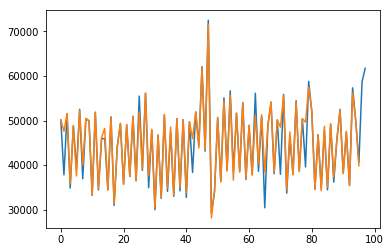

In [10]:
plt.plot(scaler.inverse_transform(y))
plt.plot(scaler.inverse_transform(model.predict(X[:-2], batch_size=32)))

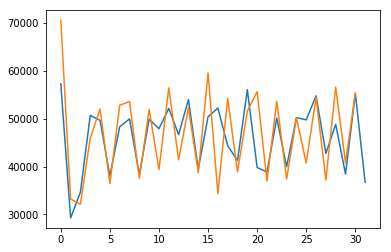

In [12]:
y_hat = scaler.inverse_transform(model.predict(X_test, batch_size=32))
y_real = scaler.inverse_transform(y_test[:-1])

plt.plot(y_hat)
plt.plot(y_real)

In [13]:
from sklearn.metrics import mean_squared_error

In [14]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [16]:
mape(y_true=y_real, y_pred=y_hat[:-1])

10.673016860253062

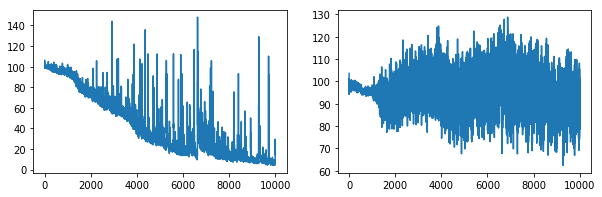

In [17]:
plt.figure(figsize=(10, 3))

plt.subplot(121)
plt.plot(history.history['loss'])

plt.subplot(122)
plt.plot(history.history['val_loss'])

In [20]:
model.save("best_model")